<a href="https://colab.research.google.com/github/hatie22/PortifolioProjects/blob/main/FoodHub_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Giving Google Colab Access to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Importing the required libraries



In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/dataset/foodhub_order.csv')

### Understanding the structure of the data

In [ ]:
# returns the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:



*   The DataFrame display 5 rows and 9 columns.

*   Data in each row corresponds to the order placed by a customer.





### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# check the number of rows and columns in the dataset
df.shape

(1898, 9)

#### Observations:



*   The data shows that the file contains 1898 rows and 9 columns.

*   This means that there are 1898 orders in the dataset, and each order has 9 attributes.





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:



*   The data contains 1898 entries and 9 columns, where 4 columns are integer type, 1 is float type, and 4 are object type.

*   The output also shows that the dataset memory usage is 133.6 KB.

*   This information can be useful in understanding the size and structure of the dataset, and the data types of the columns.






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# using isnull()function to check missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:



*   There are no missing values in any of the columns in the data.

*   This indicates that the dataset is complete and there is no need for dropping rows with missing values.




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# check the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:




*   From the DataFrame, the average cost of an order is 16.50, with a standard deviation of 7.48.

*   The minimum cost of an order is 4.47, and the maximum is 35.41.

*   The food preparation time ranges from 20 to 35 minutes, with an average of 27.37 minutes.

*   The delivery time ranges from 15 to 33 minutes, with an average of 24.16 minutes.








### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# check how many orders that are not rated
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Count the occurrences of 'Not given' in the 'rating' column
df[df['rating']=='Not given']['rating'].value_counts()

Not given    736
Name: rating, dtype: int64

#### Observations:



*   The rating column in the data has four categories: Not given, 5, 3, and 4.

*  The value count shows that 736 out of 1898 orders have a missing rating value, denoted by 'Not given'.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###**Observation on Restaurant Name**

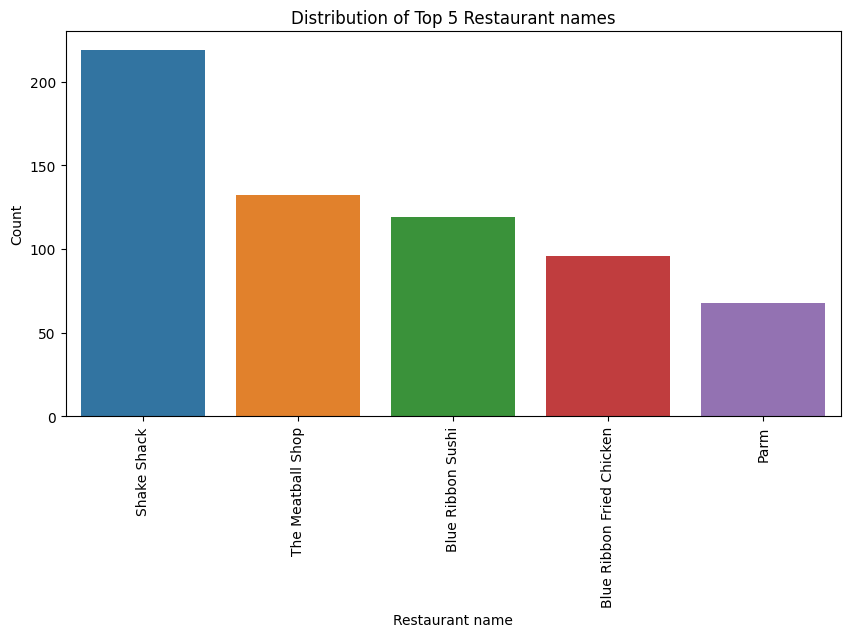

In [ ]:
# create a countplot to show the distribution of Top 5 restaurant names
plt.subplots(figsize =(10,5))
sns.countplot(data = df , x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:5].index)
plt.xticks(rotation=90)
plt.xlabel('Restaurant name')
plt.ylabel('Count')
plt.title('Distribution of Top 5 Restaurant names');

### Obsevations:



*  From the top 10 restaurant names, Shake Shack is the restaurant with the highest number of orders(219), followed by The Meatball Shop(132) and Blue Ribbon Sushi(119).

*  The last two restaurants Blue Ribbon Fried Chicken and Parm have less than 100 orders each.





### **Observation on the Customer id**

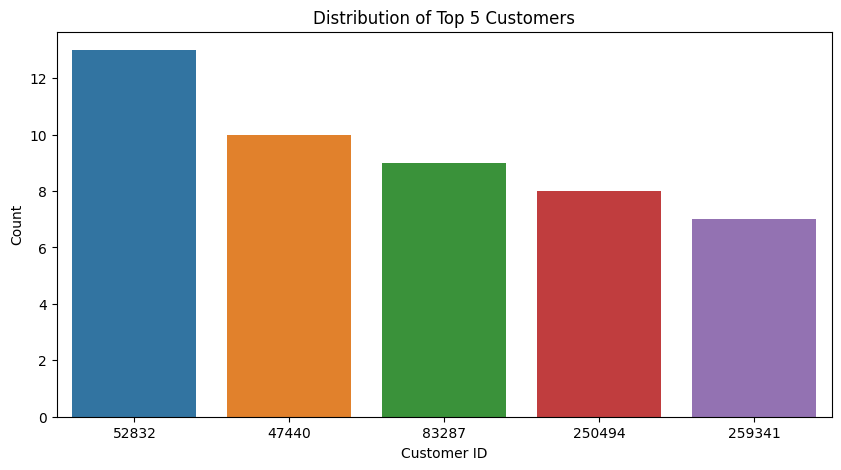

In [ ]:
# create a countplot to show the distribution of Top 5 customers
plt.subplots(figsize =(10,5))
sns.countplot(data = df , x = 'customer_id', order = df.customer_id.value_counts().iloc[:5].index)
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.title('Distribution of Top 5 Customers');

### Observations:


*  Customer ID(52832) have the highest counts followed by (47440) customer ID.

* The least count is customer ID 259341.



### **Observation on Cuisine Type**

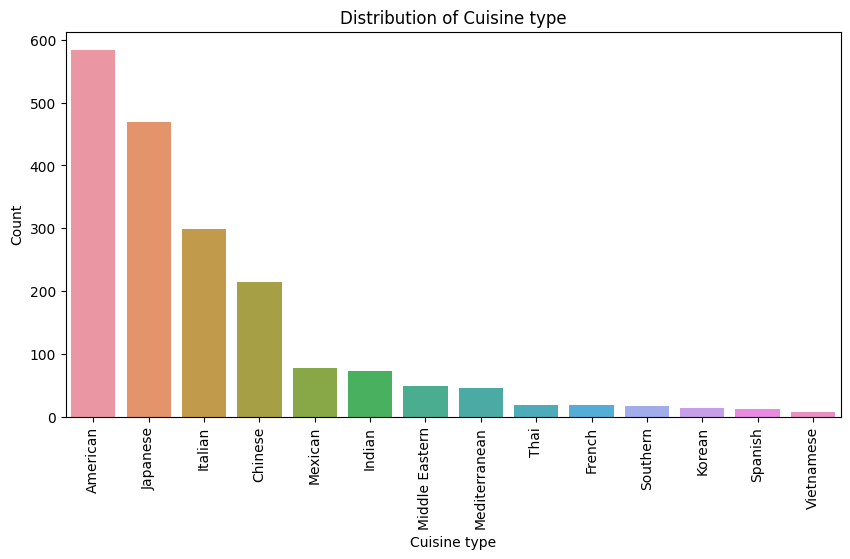

In [ ]:
# create a counplot to visualize the distribution of cuisine type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Cuisine type')
plt.xlabel('Cuisine type')
plt.ylabel('Count')
plt.show()

### Observations:



*  From the countplot, it can be seen that the most popular cuisine type in the dataset is American, followed by Japanese, Italian and then Chinese.

*  Mexican and Indian cuisines have similar counts (almost close).

*  The least popular cuisine type appears to be Vietnamese.

*  Overall, there seems to be a good variety of cuisine types ordered by customers.





### **Observation on Day of the Week**

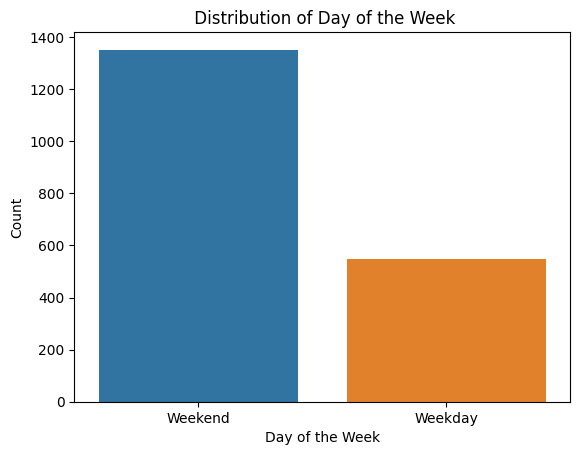

In [ ]:
# Using countplot to distribute each day of the week
sns.countplot(data=df, x='day_of_the_week')
plt.title(' Distribution of Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

### Observations:



*   The Chart above shows that the number of orders placed on weekends is higher compared to weekdays.

* This implies that customers tend to order more on weekends, possibly because they have more leisure time or they want to unwind after a hectic workweek.




### **Observation on Rating**

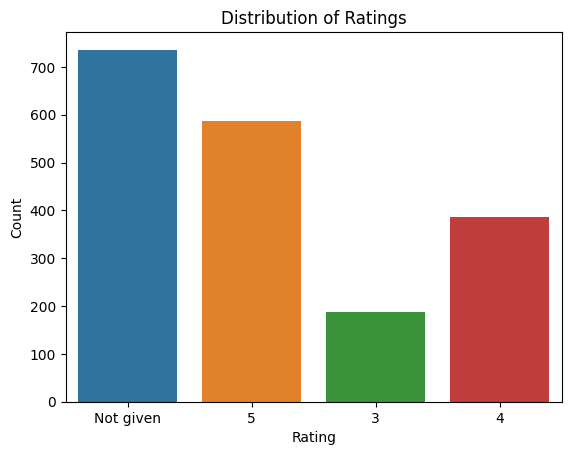

In [ ]:
# Using countplot to distribute each Rating
sns.countplot(data=df, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Observation



*  From the chart, maximum number(more than 700) of customers have Not Given their ratings.

*  Aside from the 'Not given' rating, most customers (close to 600 counts) have given 5 rating, followed by 4 rating(around 350 counts)

*  There is also a smaller number of 3 rating, which suggests that some customers had negative experiences.







### **Observation on Food Preparation Time**

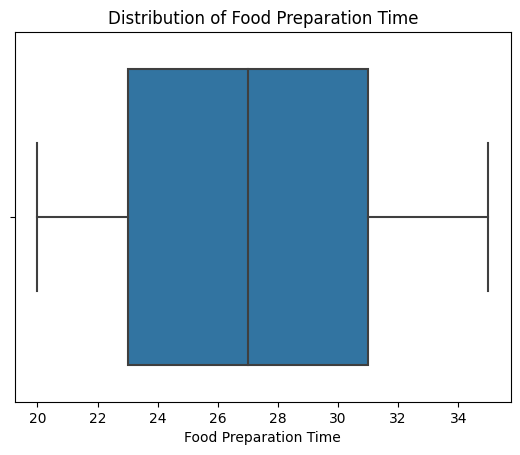

In [ ]:
# Using boxplot to visualize Food preparation time of food orders
sns.boxplot(data=df,x='food_preparation_time')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.show()

### Observations



*  The boxplot shows that the majority of the food preparation time falls between 23 and 31 minutes, with a median of around 27 minutes.

*  There are some orders that fall above 40 minutes, indicating that there are some orders that take longer to prepare.



### **Observation on Delivery Time(Boxplot)**

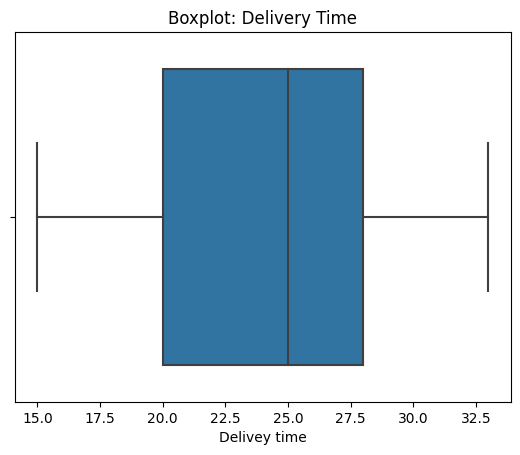

In [ ]:
# Using boxplot to visualize the delivery time of food orders
sns.boxplot(data=df, x='delivery_time')
plt.title('Boxplot: Delivery Time')
plt.xlabel('Delivey time')
plt.show()

### Observations:



*  The boxplot shows that the median delivery time is 25 minutes, with the majority of orders being delivered within the range of approximately 20-28 minutes.

*  However, there are some food deliveries above 32.5 minutes, indicating that some orders may take longer to deliver than others.



### **Observation on Delivery time(Histplot)**

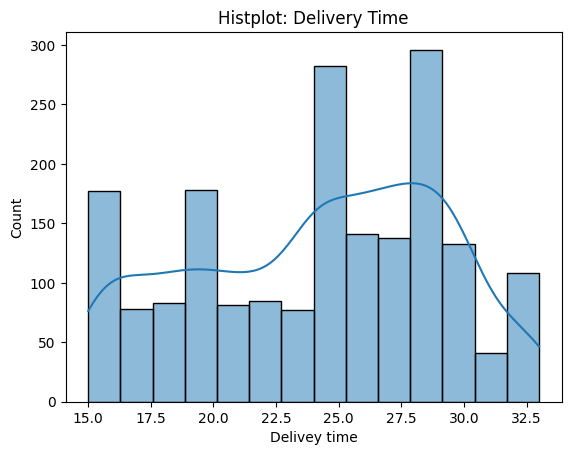

In [ ]:
# Using histplot to visualize the delivery time of food orders
sns.histplot(data=df, x='delivery_time', kde=True)
plt.title('Histplot: Delivery Time')
plt.xlabel('Delivey time')
plt.show()

### Observations:


*  The distribution is slightly skewed to the left, this indicates that most orders tend to have shorter delivery times than the average, with fewer orders taking longer to be delivered.

*  The KDE curve helps visualize the overall shape of the distribution, indicating that it resembles a slightly skewed normal distribution.




### **Observation on the Cost of orders**

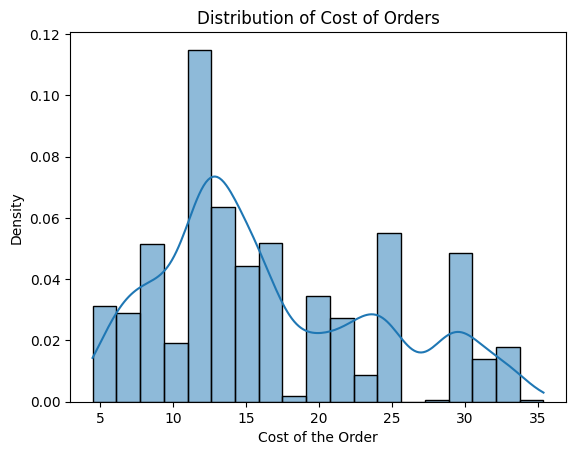

In [ ]:
# create a histogram plot to visualize the distribution of the cost of orders.
sns.histplot(data=df,x='cost_of_the_order',stat='density', kde=True)
plt.xlabel('Cost of the Order')
plt.ylabel('Density')
plt.title('Distribution of Cost of Orders')
plt.show()

### Observations:

*   From the plot ,the distribution is right-skewed, indicating that most of the orders have lower cost, but there are some orders that are much more expensive.

*  The density of orders decreases as the cost increases, with a smaller proportion of orders falling into higher cost ranges


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# calculate the top 5 restaurant in term of number of orders recieved
top_5_restaurant= df['restaurant_name'].value_counts().head(5)
top_5_restaurant

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:



*  Shake Shack is the highest among the top 5 restaurant names.

*  The number of orders for the top 2 restaurants is notably higher than the number of orders for the other three restaurants in the top 5.

* There is a significant drop in order count between the top 2 restaurants and the rest of the top 5.




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Group by cuisine type and day of the week, and aggregate by count of orders
df_agg = df.groupby(['cuisine_type', 'day_of_the_week'])['order_id'].count().reset_index()

In [ ]:
# Filter for weekends only
df_agg_weekends = df_agg[df_agg['day_of_the_week'] == 'Weekend']

In [ ]:
# Find the cuisine with the highest count of orders on weekends
most_popular_cuisine_weekend = df_agg_weekends.loc[df_agg_weekends['order_id'].idxmax(), 'cuisine_type']
print('The most popular cuisine on weekends is', most_popular_cuisine_weekend)

The most popular cuisine on weekends is American


#### Observations:


*   American Cuisine is the most popular cuisine type on weekends among all cuisine types.

*  This suggests that there is a higher demand for American food during weekends compared to other cuisine types.






### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculate the percentage of orders that cost more than $20
cost_morethan_20 = len(df[df['cost_of_the_order'] > 20])
total_orders = len(df)
percent_above_20 = cost_morethan_20 / total_orders * 100

In [ ]:
print('The Percentage of orders that cost more than 20 dollars is ', round(percent_above_20, 2),'%',sep='')

The Percentage of orders that cost more than 20 dollars is 29.24%


#### Observation:

*  The observation here is that almost 30% of all orders have a cost of more than $20. It implies that customers are willing to spend more on their orders.





### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# creating a new columns indicating the mean delivery time
mean_delivery_time = round(df['delivery_time'].mean(), 2)

In [ ]:
print('The mean order delivery time is', mean_delivery_time, 'minutes')

The mean order delivery time is 24.16 minutes


#### Observations:


*  The average delivery time for orders is 24.16 minutes, which is a relatively short amount of time.

*  This suggests that there is efficiency in the restaurant and delivery service operations.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Count the occurrences of each customer ID and number of order the placed
top_5_customers= df['customer_id'].value_counts().sort_values(ascending = False).head(5)
print(top_5_customers)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64


#### Observations:

*  The table shows the top 5 most frequent customers along with their respective order counts.

*  The customer with the highest number of orders placed 13 orders, followed by the next four customers with 10, 9, 8, and 7 orders placed respectively.

*  These customers are eligible to receive a 20% discount voucher from the company.







### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### **Observation on the Food preparation time by Cuisine type**

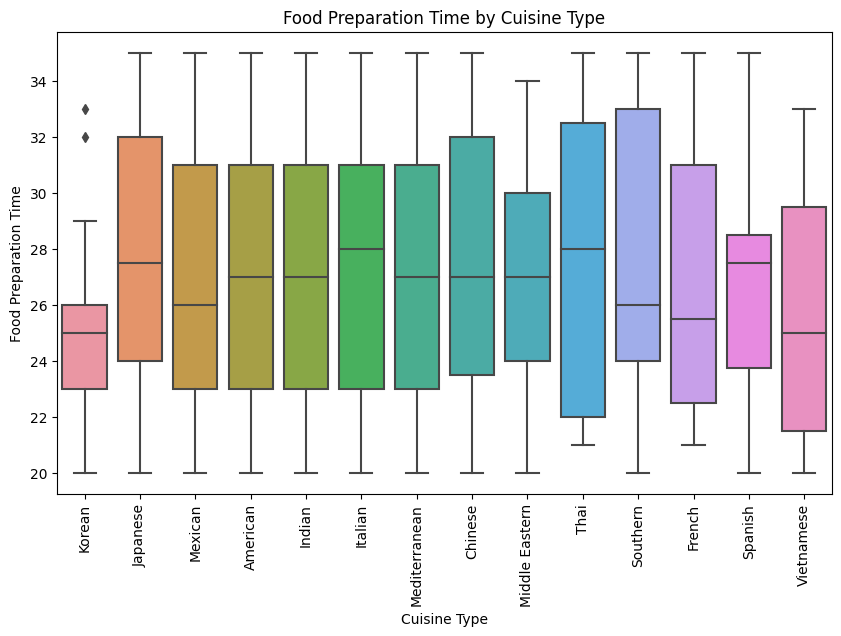

In [ ]:
# create a boxplot to show the distribution of cuisine type by food preparation time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.show()

### Observations:


*  The cuisine type with the shortest food preparation time is Korean, followed by Vietnamese.

*  Thai cuisine tends to have a longer food preparation time compared to other cuisines with minimum time around 21 munites and maximum close to 40 minutes.

*  Korean cuisine shows some outliers in terms of food preparation time, indicating that there are occasional instances where the preparation time requires longer time.









### **Observation on the distribution of each numeric variables**

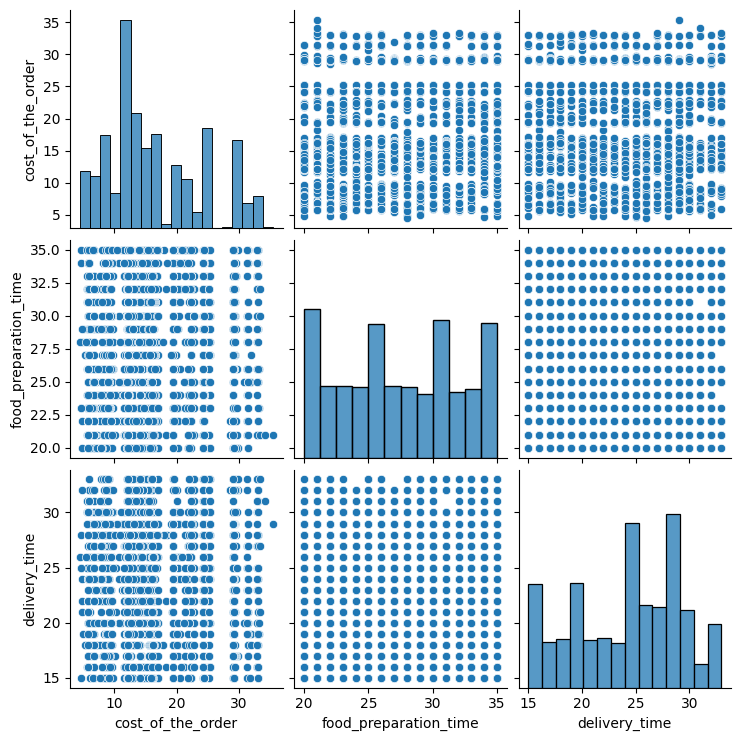

In [ ]:
# create a pairplot to show relationship of numeric variables
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time','delivery_time']);

### Observations:

*  There is no correlation between the numerical variables.

*  It implies that changes in the cost of the order do not appear to have a noticeable impact on the food preparation time.




### **Heatmap of correlation between numerical variables**

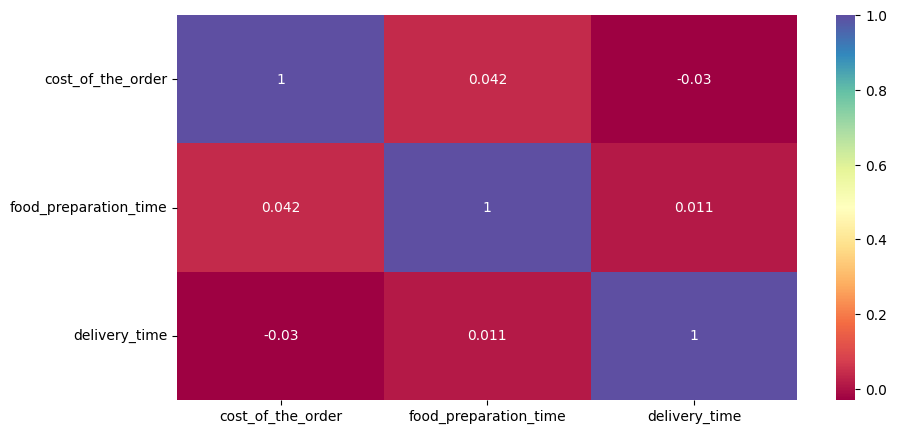

In [ ]:
# plot the heatmap to show the correlation of numerical variables
plt.figure(figsize=(10, 5))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='Spectral')
plt.show()

### Observations:


*  There is no correlation between each numerical values.

*  Cost of order and Delivery time have a strong negative correlation.The negative correlation suggests that higher-cost orders are associated with shorter delivery times.












### **Observation on the Cuisine type and Food preparation time(by day of the week)**

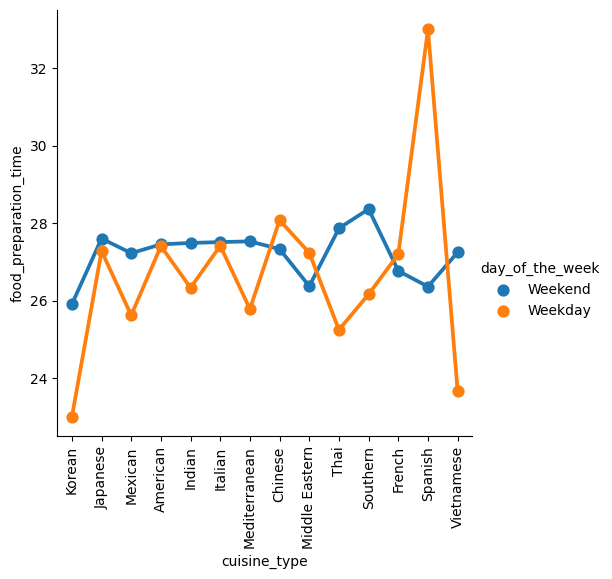

In [ ]:
# Create a catplot for the cuisine type and food preparation time
sns.catplot(data=df, x ='cuisine_type', y ='food_preparation_time', estimator= np.mean, errorbar=None, kind='point', hue ='day_of_the_week')
plt.xticks(rotation=90);

### Observations:

* Spanish cuisine tends to have the longest food preparation time on weekdays compared to other cuisine types making it the longest food preparation time for all the days of the week.

* Korean and Vietnamese cuisines have relatively shorter food preparation times on weekdays compared to other cuisine types.

*  On weekends, Southern cuisine shows the longest food preparation time among all cuisine types and the shortest is korean cuisines.

* Overall, it seems that Korean cuisine has the shortest preparation time among all cuisine types and day of the week.





### **Observation on Food preparation time and Day of the week**

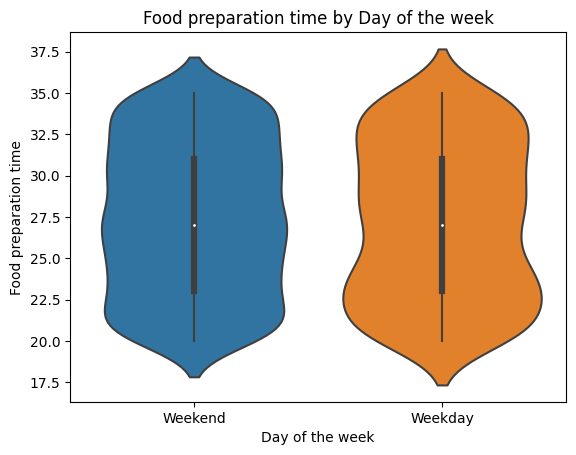

In [ ]:
# create a violinplot to show the distribution of food preparation time and delivery time
sns.violinplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.xlabel('Day of the week')
plt.ylabel('Food preparation time')
plt.title('Food preparation time by Day of the week')
plt.show()

### Observations:


* From the plot, the weekdays exhibit a slightly wider range of food preparation times compared to the weekends.



### **Observation on Cuisine type and Day of the week**

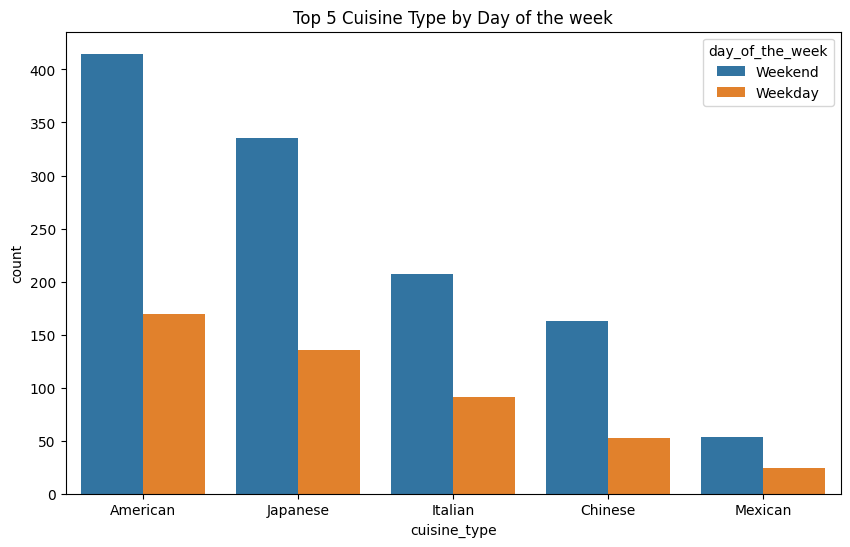

In [ ]:
# create a countplot to show the cuisine type by day of the week
plt.subplots(figsize =(10,6))
sns.countplot(data= df, x='cuisine_type', hue='day_of_the_week', order= df.cuisine_type.value_counts().iloc[:5].index)
plt.title('Top 5 Cuisine Type by Day of the week');

### Observations:


*  The countplot displays the top 5 cuisine types by the day of the week

*  It can be observed that the American cuisine type is the most popular choice on both weekdays and weekends, followed by Japanese.


*  Mexican cuisine has the smallest counts on both weekdays and weekends.









### **Observation on Cost of order by Food preparation time**

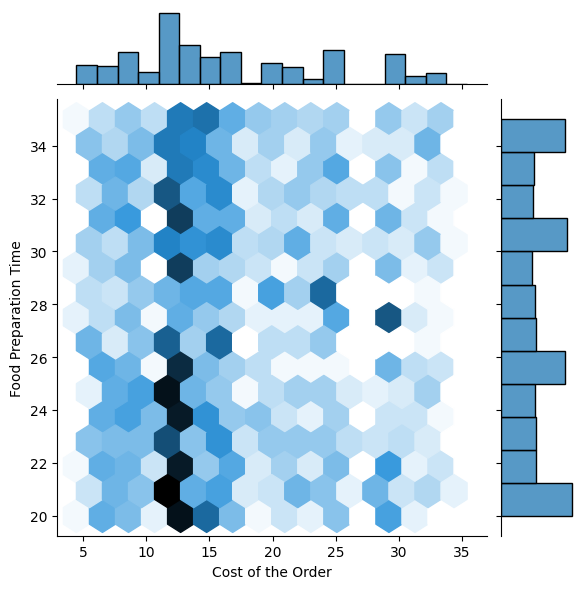

In [ ]:
# create a joinplot to show the relationship between cost of order and food preparation time
sns.jointplot(data=df, x='cost_of_the_order', y='food_preparation_time', kind='hex')
plt.xlabel('Cost of the Order')
plt.ylabel('Food Preparation Time')
plt.show()

### Observations:


* The most cost of order is between 10 to 15 dollars (darkest shapes)

* The Usual preparation time is between 20 to 26 minutes






### **Observation on Cost of order by Delivery time**

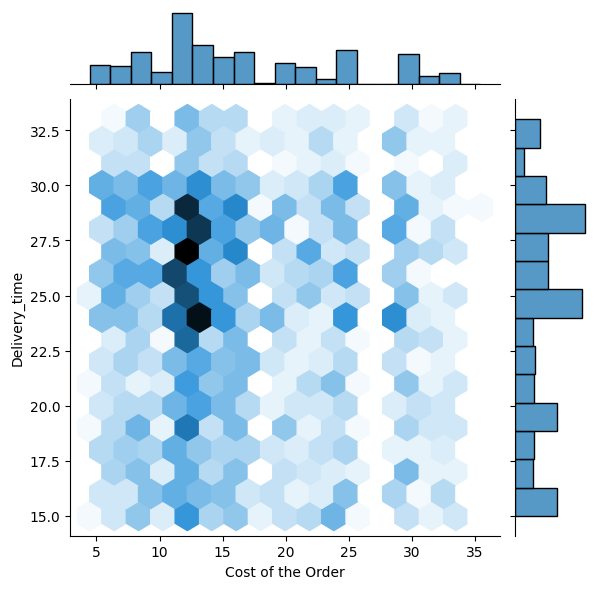

In [ ]:
# create a joinplot to show the relationship between cost of order and delivery time
sns.jointplot(data=df, x='cost_of_the_order', y='delivery_time', kind='hex')
plt.xlabel('Cost of the Order')
plt.ylabel('Delivery_time')
plt.show()

### Observations:

*  The maximum cost of order is between 10 to 15 dollars.

*  Delivery time is between 23 to 28 minutes.



### **Observation on the Delivery time by Days of the week**

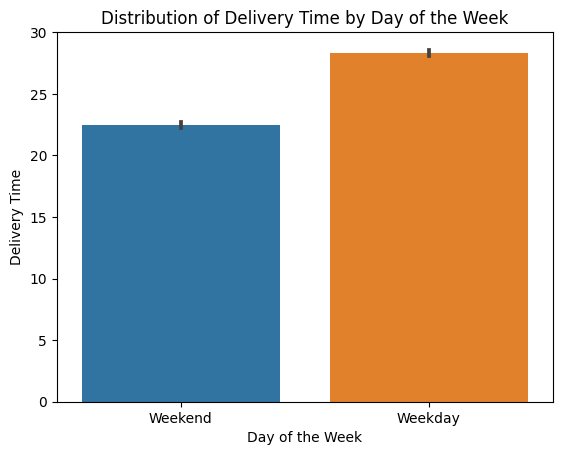

In [ ]:
# create a barplot on the distribution of delivery time by the day of the week
sns.barplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Distribution of Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

### Observations:

*  Based on the barplot, weekday has the longest delivery time of around 38 minutes.

*  Weekend has the shortest delivery time around 23 minutes



### **Observation on Rating and Cost of order**

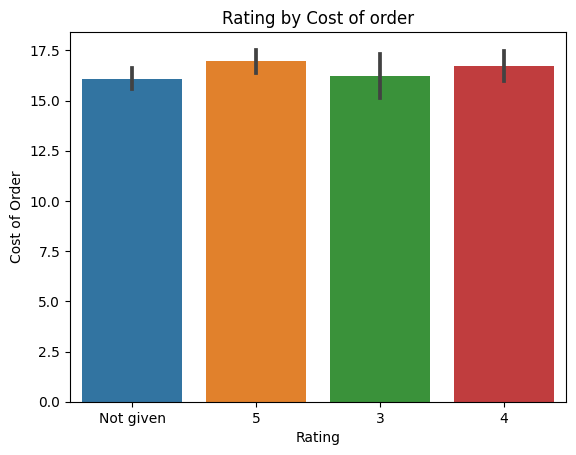

In [ ]:
# create a barplot to show the rating by cost of order
sns.barplot(data=df, x='rating', y='cost_of_the_order')
plt.title('Rating by Cost of order')
plt.xlabel('Rating')
plt.ylabel('Cost of Order')
plt.show()

### Observations:

*  Rating '5' has the highest cost of order among all the ratings.

*  It can observe that higher ratings tend to be associated with higher costs of the order.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Replace 'Not given' with NaN values in the DataFrame
df_nan= df.replace(to_replace = 'Not given', value = np.NAN)

In [ ]:
df_nan.head()
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Convert the 'rating' column to float datatype, ignoring any errors
df_nan['rating'] = df_nan['rating'].astype(dtype = 'float', errors ='ignore')

In [ ]:
# Calculate the average rating for each restaurant
avg_rating = df_nan.groupby('restaurant_name')['rating'].mean()
avg_rating

restaurant_name
'wichcraft          5.000000
12 Chairs           4.500000
5 Napkin Burger     4.000000
67 Burger           5.000000
Alidoro                  NaN
                      ...   
Zero Otto Nove      4.000000
brgr                3.000000
da Umberto          5.000000
ilili Restaurant    4.153846
indikitch           4.500000
Name: rating, Length: 178, dtype: float64

In [ ]:
# Calculate the count of ratings for each restaurant
count_rating =df_nan.groupby('restaurant_name')['rating'].count()
count_rating

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating, Length: 178, dtype: int64

In [ ]:
# Merge the average rating and count of ratings into a single DataFrame
total_data = pd.merge(avg_rating, count_rating, on =avg_rating.index, how ='inner')
total_data.head()

,key_0,rating_x,rating_y
0,'wichcraft,5.0,1
1,12 Chairs,4.5,2
2,5 Napkin Burger,4.0,2
3,67 Burger,5.0,1
4,Alidoro,NaN,0


#### Observations:

*  The 'rating_x' column seems to have a higher average rating compared to the 'rating_y' column, given the presence of a 5.0 rating in 'rating_x' and a maximum rating of 2 in 'rating_y'.





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# using For loop to calculate the net revenue based on different conditions
sum = 0

for i in df['cost_of_the_order']:
  if (i >20):
    sum = sum+(i*0.25)
  elif (5 <i <20):
    sum = sum+(i*0.15)
  else:
    sum = sum +(i*0)
print('Net Revenue is $', round(sum), sep='')

Net Revenue is $6166


#### Observations:


*  The company generated a net revenue of $6166 from all the orders.

*  This indicates the total income earned by the company after deducting the respective charging percentages for orders above 20 and 5 dollars.

*  The net revenue represents the company's overall financial gain from its operations






### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total time by adding the food preparation time and delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [ ]:
# Calculate the percentage of rows where the total_time is greater than 60
percentage_over_60_minutes= (len(df[df['total_time'] > 60]) / len(df)) * 100

In [ ]:
print('Percentage of orders taking more than 60 minutes for delivery is ', round(percentage_over_60_minutes, 2), '%', sep='')

Percentage of orders taking more than 60 minutes for delivery is 10.54%


#### Observations:


*  Approximately 10.54% of orders take more than 60 minutes for delivery.

*  This indicates a need to address delivery efficiency and minimize delays to enhance overall customer satisfaction.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time for each day of the week using groupby
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

*  The mean delivery time on weekdays is approximately 28.34 minutes, while on weekends it is around 22.47 minutes.

*  This suggests that the delivery time tends to be slightly shorter on weekends compared to weekdays.




### **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American cuisine is the most popular cuisine type, especially on weekends. The company can focus on promoting and expanding its American cuisine offerings to meet the high demand.

*  The majority of restaurants have received high average ratings, indicating overall customer satisfaction. However, there are some restaurants with lower ratings.

*  In several cuisine types, there are some dishes that take significantly longer to prepare than others. This may be due to the complexity of the recipe or the specific ingredients that are used.





### Recommendations:

*  Diversify Menu: Identify popular cuisines based on customer feedback other than American. Introduce new menu items or collaborate with restaurants offering those cuisines to broaden the range of options and attract a larger customer base.

*  Boost customer engagement by motivating them to provide feedback and ratings through the use of discounts.

*  From the analysis, the most orders are delivered within a reasonable time frame. However, efforts should be made to reduce delivery times, particularly for orders that take more than 60 minutes.



In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/FoodHub_Project.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/FoodHub_Project.ipynb to html
[NbConvertApp] Writing 1663824 bytes to /content/drive/MyDrive/FoodHub_Project.html
